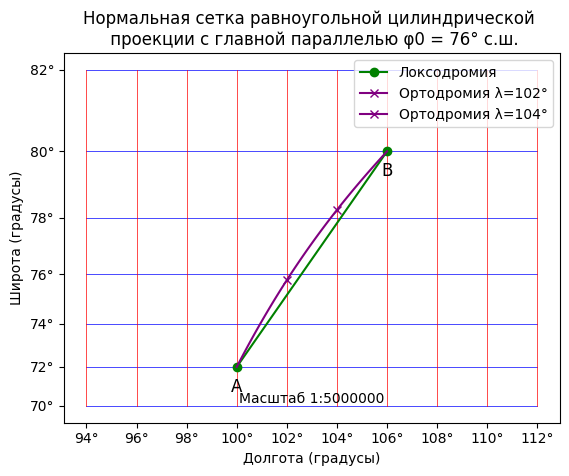

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Функция для преобразования координат в проекцию Меркатора (только для y, x оставляем в градусах)
def mercator_y(lat):
    lat = np.deg2rad(lat)
    y = np.log(np.tan(np.pi / 4 + lat / 2))
    return y

# Функция для обратного преобразования координат в градусы
def inv_mercator_y(y):
    return np.rad2deg(2 * np.arctan(np.exp(y)) - np.pi / 2)

# Параметры
phi0 = 76  # Центральная параллель
lambda0 = (94 + 112) / 2  # Центральный меридиан
phi_min = 70
phi_max = 82
lambda_min = 94
lambda_max = 112
delta_phi = 2
delta_lambda = 2

# Географические координаты точек А и В
phi_A = 72
lambda_A = 100
phi_B = 80
lambda_B = 106

# Вычисление вспомогательного угла U
U = 0.122618931

# Корректировка координат ортодромии
lambda_i = [102, 104]
phi_ort = [75.78417552, 78.26086154]

# Создание сетки
fig, ax = plt.subplots()

# Рисование параллелей (линии широты)
latitudes = np.arange(phi_min, phi_max + delta_phi, delta_phi)
longitudes = np.arange(lambda_min, lambda_max + delta_lambda, delta_lambda)
for lat in latitudes:
    lons = np.linspace(lambda_min, lambda_max, 100)
    y = mercator_y(lat)
    ax.plot(lons, [y] * len(lons), color='blue', linewidth=0.5)

# Рисование меридианов (линии долготы)
for lon in longitudes:
    lats = np.linspace(phi_min, phi_max, 100)
    y = mercator_y(lats)
    ax.plot([lon] * len(lats), y, color='red', linewidth=0.5)

# Нанесение точек A и B и их локсодромии
ax.plot([lambda_A, lambda_B], [mercator_y(phi_A), mercator_y(phi_B)], color='green', linestyle='-', marker='o', label='Локсодромия')
ax.text(lambda_A, mercator_y(phi_A)-0.03, 'A', ha='center', va='top', fontsize=12)
ax.text(lambda_B, mercator_y(phi_B)-0.08, 'B', ha='center', va='bottom', fontsize=12)

# Нанесение точек ортодромии
for lam, phi in zip(lambda_i, phi_ort):
    ax.plot(lam, mercator_y(phi), color='purple', marker='x', label=f'Ортодромия λ={lam}°')

# Соединение всех точек плавной линией
spline = make_interp_spline([lambda_A] + lambda_i + [lambda_B], [mercator_y(phi_A)] + [mercator_y(phi) for phi in phi_ort] + [mercator_y(phi_B)])
x_smooth = np.linspace(lambda_A, lambda_B, 100)
y_smooth = spline(x_smooth)
ax.plot(x_smooth, y_smooth, color='purple')

# Установим метки на оси y в градусах широты
y_ticks = mercator_y(latitudes)
y_labels = [f'{lat}°' for lat in latitudes]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

# Установим метки на оси x в градусах долготы
x_ticks = np.arange(lambda_min, lambda_max + delta_lambda, delta_lambda)
x_labels = [f'{lon}°' for lon in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

# Добавление масштаба внизу посередине карты
ax.text((lambda_min + lambda_max) / 2, mercator_y(phi_min), 'Масштаб 1:5000000', ha='center', va='bottom', fontsize=10)

# Настройка графика
ax.set_xlabel('Долгота (градусы)')
ax.set_ylabel('Широта (градусы)')
ax.set_title('Нормальная сетка равноугольной цилиндрической \n проекции с главной параллелью φ0 = 76° с.ш.')

# Добавление легенды
ax.legend()

plt.savefig('map.png', dpi=300, bbox_inches='tight')

plt.show()
